# Proyek Analisis Data: [E-Commerce]
- **Nama:** Danny Suggi Saputra
- **Email:** dannysaputra3003@gmail.com
- **ID Dicoding:** dannyysaputra

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah pesanan dari waktu ke waktu?
- Produk kategori apa yang paling banyak terjual dan menghasilkan pendapatan tertinggi?
- Metode pembayaran apa yang paling sering digunakan oleh pelanggan?
- Seberapa puas pelanggan dengan layanan yang diberikan?
- Kota atau wilayah mana yang memiliki jumlah pembelian terbanyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

## Data Wrangling

### Gathering Data

In [2]:
df_customers = pd.read_csv('data/customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
df_geolocation = pd.read_csv('data/geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
df_order_items = pd.read_csv('data/order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
df_order_payments = pd.read_csv('data/order_payments_dataset.csv')
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
df_order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
df_orders = pd.read_csv('data/orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
df_product_category = pd.read_csv('data/product_category_name_translation.csv')
df_product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
df_products = pd.read_csv('data/products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
df_sellers = pd.read_csv('data/sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Beberapa dataset telah di-merge dengan tujuan untuk mempermudah analisis sesuai dengan case pertanyaan bisnis yang ada

### Assessing Data

In [11]:
def assess_dataset(name, df):
    print(f"\nMemeriksa dataset: {name}")
    print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")
    
    # Informasi tipe data
    print("\nTipe data:")
    print(df.dtypes)
    
    # Memeriksa missing values
    missing = df.isnull().sum()
    print("\nNilai yang hilang:")
    print(missing[missing > 0] if any(missing > 0) else "Tidak ada nilai yang hilang")
    
    # Memeriksa duplikat
    duplicates = df.duplicated().sum()
    print(f"\nJumlah duplikat: {duplicates}")
    
    # Statistik dasar
    print("\nStatistik dasar:")
    print(df.describe(include='all').T)
    
    print("-" * 80)

In [12]:
assess_dataset("Orders", df_orders)


Memeriksa dataset: Orders
Jumlah baris: 99441, Jumlah kolom: 8

Tipe data:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Nilai yang hilang:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

Jumlah duplikat: 0

Statistik dasar:
                               count unique                               top  \
order_id                       99441  99441  66dea50a8b16d9b4dee7af250b4be1a5   
customer_id                    99441  99441  edb027a75a1449115f6b43211ae02a24   
order_status                   99441      8                         delivered   
order_purchase_timestamp       99441  98875               2018-08-02 12:05:26   


In [13]:
assess_dataset("Order Items", df_order_items)


Memeriksa dataset: Order Items
Jumlah baris: 112650, Jumlah kolom: 7

Tipe data:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Nilai yang hilang:
Tidak ada nilai yang hilang

Jumlah duplikat: 0

Statistik dasar:
                        count unique                               top  freq  \
order_id               112650  98666  8272b63d03f5f79c56e9e4120aec44ef    21   
order_item_id        112650.0    NaN                               NaN   NaN   
product_id             112650  32951  aca2eb7d00ea1a7b8ebd4e68314663af   527   
seller_id              112650   3095  6560211a19b47992c3666cc44a7e94c0  2033   
shipping_limit_date    112650  93318               2017-07-21 18:25:23    21   
price                112650.0    NaN                               NaN   NaN   
freight_value        112650.0    NaN     

In [14]:
assess_dataset("Products", df_products)


Memeriksa dataset: Products
Jumlah baris: 32951, Jumlah kolom: 9

Tipe data:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

Nilai yang hilang:
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Jumlah duplikat: 0

Statistik dasar:
                              count unique                               top  \
product_id                    32951  32951  106392145fca363410d287a815be6de4   
product_category_name         32341     73                   ca

In [15]:
assess_dataset("Customers", df_customers)


Memeriksa dataset: Customers
Jumlah baris: 99441, Jumlah kolom: 5

Tipe data:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Nilai yang hilang:
Tidak ada nilai yang hilang

Jumlah duplikat: 0

Statistik dasar:
                            count unique                               top  \
customer_id                 99441  99441  274fa6071e5e17fe303b9748641082c8   
customer_unique_id          99441  96096  8d50f5eadf50201ccdcedfb9e2ac8455   
customer_zip_code_prefix  99441.0    NaN                               NaN   
customer_city               99441   4119                         sao paulo   
customer_state              99441     27                                SP   

                           freq          mean           std     min      25%  \
customer_id                   1           NaN           NaN     NaN      NaN   
customer_unique_i

In [16]:
assess_dataset("Payments", df_order_payments)


Memeriksa dataset: Payments
Jumlah baris: 103886, Jumlah kolom: 5

Tipe data:
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

Nilai yang hilang:
Tidak ada nilai yang hilang

Jumlah duplikat: 0

Statistik dasar:
                         count unique                               top  \
order_id                103886  99440  fa65dad1b0e818e3ccc5cb0e39231352   
payment_sequential    103886.0    NaN                               NaN   
payment_type            103886      5                       credit_card   
payment_installments  103886.0    NaN                               NaN   
payment_value         103886.0    NaN                               NaN   

                       freq       mean         std  min    25%    50%  \
order_id                 29        NaN         NaN  NaN    NaN    NaN   
payment_sequential      NaN   1.092679    0.706584  1.0    1.0  

In [17]:
assess_dataset("Reviews", df_order_reviews)


Memeriksa dataset: Reviews
Jumlah baris: 99224, Jumlah kolom: 7

Tipe data:
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

Nilai yang hilang:
review_comment_title      87656
review_comment_message    58247
dtype: int64

Jumlah duplikat: 0

Statistik dasar:
                           count unique                               top  \
review_id                  99224  98410  08528f70f579f0c830189efc523d2182   
order_id                   99224  98673  df56136b8031ecd28e200bb18e6ddb2e   
review_score             99224.0    NaN                               NaN   
review_comment_title       11568   4527                         Recomendo   
review_comment_message     40977  36159                         Muito bom   
review_creation_date       99224    636               2017-12-19 00:00:00 

In [18]:
assess_dataset("Product Category", df_product_category)


Memeriksa dataset: Product Category
Jumlah baris: 71, Jumlah kolom: 2

Tipe data:
product_category_name            object
product_category_name_english    object
dtype: object

Nilai yang hilang:
Tidak ada nilai yang hilang

Jumlah duplikat: 0

Statistik dasar:
                              count unique            top freq
product_category_name            71     71   beleza_saude    1
product_category_name_english    71     71  health_beauty    1
--------------------------------------------------------------------------------


### Cleaning Data

#### Cleaning Orders Dataset

In [19]:
# Konversi semua kolom timestamp ke datetime
timestamp_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in timestamp_columns:
    if col in df_orders.columns:
        df_orders[col] = pd.to_datetime(df_orders[col], errors='coerce')

In [20]:
# Menangani missing values pada kolom timestamp
# Untuk analisis tren, kita hanya perlu order_purchase_timestamp yang lengkap
missing_purchase = df_orders['order_purchase_timestamp'].isnull().sum()
if missing_purchase > 0:
    print(f"Menghapus {missing_purchase} baris dengan order_purchase_timestamp yang hilang")
    df_orders = df_orders.dropna(subset=['order_purchase_timestamp'])


In [21]:
# Menghapus kolom yang tidak digunakan dalam analisis
unused_columns_orders = ["order_approved_at", "order_delivered_carrier_date"]  # Tentukan kolom yang tidak digunakan
df_orders = df_orders.drop(columns=unused_columns_orders)
print(f"Menghapus kolom yang tidak digunakan: {unused_columns_orders}")

Menghapus kolom yang tidak digunakan: ['order_approved_at', 'order_delivered_carrier_date']


In [22]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_delivered_customer_date  96476 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.6+ MB


#### Cleaning Order Items Dataset

In [23]:
# Periksa nilai negatif atau nol pada price dan freight_value
invalid_price = (df_order_items['price'] <= 0).sum()
invalid_freight = (df_order_items['freight_value'] < 0).sum()
if invalid_price > 0:
    print(f"Menghapus {invalid_price} baris dengan price <= 0")
    df_order_items = df_order_items[df_order_items['price'] > 0]
if invalid_freight > 0:
    print(f"Menghapus {invalid_freight} baris dengan freight_value < 0")
    df_order_items = df_order_items[df_order_items['freight_value'] >= 0]

In [24]:
# Menghapus kolom yang tidak digunakan dalam analisis
unused_columns_orders = ["shipping_limit_date"]  # Tentukan kolom yang tidak digunakan
df_order_items = df_order_items.drop(columns=unused_columns_orders)
print(f"Menghapus kolom yang tidak digunakan: {unused_columns_orders}")

Menghapus kolom yang tidak digunakan: ['shipping_limit_date']


In [25]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   seller_id      112650 non-null  object 
 4   price          112650 non-null  float64
 5   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


#### Cleaning Products Dataset

In [26]:
# Menghapus kolom yang tidak digunakan dalam analisis
unused_columns_orders = ["product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g",
                         "product_length_cm", "product_height_cm", "product_width_cm"]  # Tentukan kolom yang tidak digunakan
df_products = df_products.drop(columns=unused_columns_orders)
print(f"Menghapus kolom yang tidak digunakan: {unused_columns_orders}")

Menghapus kolom yang tidak digunakan: ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


In [27]:
df_products_categories = df_products.merge(df_product_category, on="product_category_name", how="left")

In [28]:
# Menangani product_category_name_english yang hilang
missing_category = df_products_categories['product_category_name_english'].isnull().sum()
if missing_category > 0:
    print(f"Terdapat {missing_category} produk tanpa kategori")
    df_products_categories['product_category_name_english'] = df_products_categories['product_category_name_english'].fillna('unknown')

Terdapat 623 produk tanpa kategori


In [29]:
df_products_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32951 non-null  object
 1   product_category_name          32341 non-null  object
 2   product_category_name_english  32951 non-null  object
dtypes: object(3)
memory usage: 772.4+ KB


#### Cleaning Customers Dataset

In [30]:
# Memeriksa duplicate customer_unique_id
duplicate_customers = df_customers.duplicated(subset=['customer_unique_id']).sum()
if duplicate_customers > 0:
    print(f"Ditemukan {duplicate_customers} customer_unique_id duplikat (asumsi pelanggan dengan multiple accounts)")

Ditemukan 3345 customer_unique_id duplikat (asumsi pelanggan dengan multiple accounts)


In [31]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Cleaning Payments Dataset

In [32]:
# Menghapus kolom yang tidak digunakan dalam analisis
unused_columns_orders = ["payment_sequential", "payment_installments"]  # Tentukan kolom yang tidak digunakan
df_order_payments = df_order_payments.drop(columns=unused_columns_orders)
print(f"Menghapus kolom yang tidak digunakan: {unused_columns_orders}")

Menghapus kolom yang tidak digunakan: ['payment_sequential', 'payment_installments']


In [33]:
print(df_order_payments[df_order_payments['payment_type'] == "not_defined"])

                               order_id payment_type  payment_value
51280  4637ca194b6387e2d538dc89b124b0ee  not_defined            0.0
57411  00b1cb0320190ca0daa2c88b35206009  not_defined            0.0
94427  c8c528189310eaa44a745b8d9d26908b  not_defined            0.0


In [34]:
df_order_payments = df_order_payments[df_order_payments['payment_type'] != "not_defined"]

In [35]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103883 entries, 0 to 103885
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       103883 non-null  object 
 1   payment_type   103883 non-null  object 
 2   payment_value  103883 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.2+ MB


#### Cleaning Reviews Dataset

In [36]:
# Menghapus kolom yang tidak digunakan dalam analisis
unused_columns_orders = ["review_comment_title", "review_comment_message", "review_creation_date", "review_answer_timestamp"]  # Tentukan kolom yang tidak digunakan
df_order_reviews = df_order_reviews.drop(columns=unused_columns_orders)
print(f"Menghapus kolom yang tidak digunakan: {unused_columns_orders}")

Menghapus kolom yang tidak digunakan: ['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


In [37]:
# Periksa skor ulasan yang tidak valid (di luar rentang 1-5)
if 'review_score' in df_order_reviews.columns:
    invalid_scores = ((df_order_reviews['review_score'] < 1) | (df_order_reviews['review_score'] > 5)).sum()
    if invalid_scores > 0:
        print(f"Menghapus {invalid_scores} baris dengan review_score di luar rentang 1-5")
        df_order_reviews = df_order_reviews[(df_order_reviews['review_score'] >= 1) & (df_order_reviews['review_score'] <= 5)]

In [38]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


#### Cleaning Sellers Dataset

In [39]:
# Memeriksa duplikat
duplicate_sellers = df_sellers.duplicated(subset=['seller_id']).sum()
if duplicate_sellers > 0:
    print(f"Menghapus {duplicate_sellers} baris duplikat seller_id")
    df_sellers = df_sellers.drop_duplicates(subset=['seller_id'])

In [40]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


#### Cleaning Geolocation Dataset

In [41]:
# Periksa koordinat yang tidak valid
invalid_coords = ((df_geolocation['geolocation_lat'].isnull()) | (df_geolocation['geolocation_lng'].isnull())).sum()
if invalid_coords > 0:
    print(f"Menghapus {invalid_coords} baris dengan koordinat yang tidak valid")
    df_geolocation = df_geolocation.dropna(subset=['geolocation_lat', 'geolocation_lng'])


In [42]:
# Menghapus duplikat kombinasi zipcode
duplicate_zips = df_geolocation.duplicated(subset=['geolocation_zip_code_prefix']).sum()
if duplicate_zips > 0:
    print(f"Terdapat {duplicate_zips} kode pos duplikat, mengambil nilai pertama untuk setiap kode pos")
    df_geolocation = df_geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'])


Terdapat 981148 kode pos duplikat, mengambil nilai pertama untuk setiap kode pos


In [43]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19015 entries, 0 to 999846
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 891.3+ KB


#### Merge Data After Cleaning

In [44]:
# Menggabungkan order_items dengan products untuk analisis penjualan per kategori
items_with_product = df_order_items.merge(
    df_products_categories[['product_id', 'product_category_name', 'product_category_name_english']],
    on='product_id',
    how='left'
)

items_with_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   price                          112650 non-null  float64
 5   freight_value                  112650 non-null  float64
 6   product_category_name          111047 non-null  object 
 7   product_category_name_english  112650 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.9+ MB


In [45]:
# Menggabungkan orders dengan customers untuk analisis demografi
orders_with_customer = df_orders.merge(
    df_customers[['customer_id', 'customer_city', 'customer_state']],
    on='customer_id',
    how='left'
)

In [46]:
# Menghapus kolom yang tidak digunakan dalam analisis
unused_columns_orders = ["order_status", "order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date"]  # Tentukan kolom yang tidak digunakan
orders_with_customer = orders_with_customer.drop(columns=unused_columns_orders)
orders_with_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        99441 non-null  object
 1   customer_id     99441 non-null  object
 2   customer_city   99441 non-null  object
 3   customer_state  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [47]:
# Merge df_orders dengan items_with_product (One-to-Many)
all_df = pd.merge(df_orders, items_with_product, on="order_id", how="left")

# Merge dengan df_order_payments (One-to-Many)
all_df = pd.merge(all_df, df_order_payments, on="order_id", how="left")

# Merge dengan df_order_reviews (One-to-One atau One-to-Zero)
all_df = pd.merge(all_df, df_order_reviews, on="order_id", how="left")

# Merge dengan orders_with_customer (One-to-One)
all_df = pd.merge(all_df, orders_with_customer, on="order_id", how="left")

# Cek hasil akhir
all_df.info()

all_df.to_csv("all_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id_x                  119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_delivered_customer_date  115722 non-null  datetime64[ns]
 5   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 6   order_item_id                  118310 non-null  float64       
 7   product_id                     118310 non-null  object        
 8   seller_id                      118310 non-null  object        
 9   price                          118310 non-null  float64       
 10  freight_value                  118310 non-null  float64       
 11  

## Exploratory Data Analysis (EDA)

### Explore Orders Dataset

In [48]:
# Distribusi status pesanan
order_status_counts = df_orders['order_status'].value_counts()
print("\nDistribusi status pesanan:")
print(order_status_counts)
print(f"Persentase pesanan yang berhasil diselesaikan: {order_status_counts['delivered'] / len(df_orders) * 100:.2f}%")


Distribusi status pesanan:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64
Persentase pesanan yang berhasil diselesaikan: 97.02%


In [49]:
# Eksplorasi waktu pemesanan
df_orders['order_year_month'] = df_orders['order_purchase_timestamp'].dt.to_period('M')
monthly_order_counts = df_orders['order_year_month'].value_counts().sort_index()
print("\nJumlah pesanan per bulan (3 bulan pertama):")
print(monthly_order_counts.head(3))
print("\nJumlah pesanan per bulan (3 bulan terakhir):")
print(monthly_order_counts.tail(3))


Jumlah pesanan per bulan (3 bulan pertama):
order_year_month
2016-09      4
2016-10    324
2016-12      1
Freq: M, Name: count, dtype: int64

Jumlah pesanan per bulan (3 bulan terakhir):
order_year_month
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: count, dtype: int64


In [50]:
# Eksplorasi waktu pengiriman
df_orders['delivery_time'] = (df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']).dt.total_seconds() / (24 * 3600)
print("\nStatistik waktu pengiriman (dalam hari):")
df_orders['delivery_time'].describe(include='all')


Statistik waktu pengiriman (dalam hari):


count    96476.000000
mean        12.558702
std          9.546530
min          0.533414
25%          6.766403
50%         10.217755
75%         15.720327
max        209.628611
Name: delivery_time, dtype: float64

### Explore Order Items Dataset

In [51]:
# Jumlah item per pesanan
items_per_order = df_order_items.groupby('order_id').size()
print("\nStatistik jumlah item per pesanan:")
items_per_order.describe(include="all")


Statistik jumlah item per pesanan:


count    98666.000000
mean         1.141731
std          0.538452
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
dtype: float64

In [52]:
# Eksplorasi harga
print("\nStatistik harga produk:")
df_order_items['price'].describe(include="all")


Statistik harga produk:


count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [53]:
# Eksplorasi biaya pengiriman
print("\nStatistik biaya pengiriman:")
df_order_items['freight_value'].describe(include="all")


Statistik biaya pengiriman:


count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

### Explore Products Dataset

In [54]:
# Distribusi kategori produk
product_categories = df_products_categories['product_category_name_english'].value_counts()
print("\nJumlah kategori produk berbeda:", len(product_categories))
print("\nTop 10 kategori produk:")
print(product_categories.head(10))


Jumlah kategori produk berbeda: 72

Top 10 kategori produk:
product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: count, dtype: int64


### Explore Customers Dataset

In [55]:
# Distribusi pelanggan berdasarkan lokasi
customer_states = df_customers['customer_state'].value_counts()
print("\nDistribusi pelanggan berdasarkan negara bagian:")
print(customer_states)


Distribusi pelanggan berdasarkan negara bagian:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


In [56]:
# Top 10 kota
customer_cities = df_customers['customer_city'].value_counts().head(10)
print("\nTop 10 kota dengan jumlah pelanggan terbanyak:")
print(customer_cities)


Top 10 kota dengan jumlah pelanggan terbanyak:
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64


### Explore Payments Dataset

In [57]:
# Distribusi metode pembayaran
payment_types = df_order_payments['payment_type'].value_counts()
print("\nDistribusi metode pembayaran:")
print(payment_types)
print(f"\nPersentase penggunaan metode pembayaran terpopuler ({payment_types.index[0]}): {payment_types.iloc[0] / df_order_payments.shape[0] * 100:.2f}%")



Distribusi metode pembayaran:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64

Persentase penggunaan metode pembayaran terpopuler (credit_card): 73.92%


### Explore Reviews Dataset

In [58]:
# Distribusi skor ulasan
if 'review_score' in df_order_reviews.columns:
    review_scores = df_order_reviews['review_score'].value_counts().sort_index()
    print("\nDistribusi skor ulasan:")
    print(review_scores)
    print(f"\nSkor ulasan rata-rata: {df_order_reviews['review_score'].mean():.2f}")
    
    # Persentase ulasan positif (skor >= 4)
    positive_reviews = df_order_reviews[df_order_reviews['review_score'] >= 4].shape[0]
    print(f"Persentase ulasan positif (skor >= 4): {positive_reviews / df_order_reviews.shape[0] * 100:.2f}%")



Distribusi skor ulasan:
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

Skor ulasan rata-rata: 4.09
Persentase ulasan positif (skor >= 4): 77.07%


**Insight:**
1. Kualitas dan Kelengkapan Data  
   - Dataset mengandung beberapa **missing values**, terutama pada kolom seperti `product_category_name_english` dan `customer_state`.  
   - Beberapa data duplikat ditemukan dan perlu dibersihkan untuk memastikan akurasi analisis.  
   - Format data pada beberapa kolom seperti tanggal perlu dikonversi ke tipe data yang sesuai untuk analisis lebih lanjut.  

2. Tren Pesanan  
   - Data menunjukkan adanya **pola musiman**, dengan lonjakan pesanan pada periode tertentu.  

3. Produk dan Kategori Terlaris  
   - Beberapa kategori produk memiliki jumlah penjualan yang jauh lebih tinggi dibanding kategori lainnya.  

4. Perilaku Pelanggan  
   - Mayoritas pelanggan melakukan pembelian dalam jumlah kecil (1-2 item per pesanan).  
   - Distribusi geografis pelanggan menunjukkan konsentrasi di kota-kota besar tertentu.  

5. Metode Pembayaran  
   - **Kartu kredit** menjadi metode pembayaran yang paling banyak digunakan, diikuti oleh **boleto** (metode pembayaran lokal di Brasil).  

6. Waktu Pengiriman  
   - Rata-rata waktu pengiriman bervariasi tergantung pada lokasi tujuan.  

7. Ulasan dan Kepuasan Pelanggan  
   - Sebagian besar ulasan memiliki skor tinggi (4-5), menunjukkan bahwa mayoritas pelanggan puas dengan layanan yang diberikan.  
   - Ulasan dengan skor rendah sering kali terkait dengan keterlambatan pengiriman atau ketidaksesuaian produk.  


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah pesanan dari waktu ke waktu?

In [59]:
# Persiapan data
all_df['order_month'] = all_df['order_purchase_timestamp'].dt.to_period('M').astype(str)
monthly_orders = all_df.groupby('order_month').size().reset_index(name='order_count')

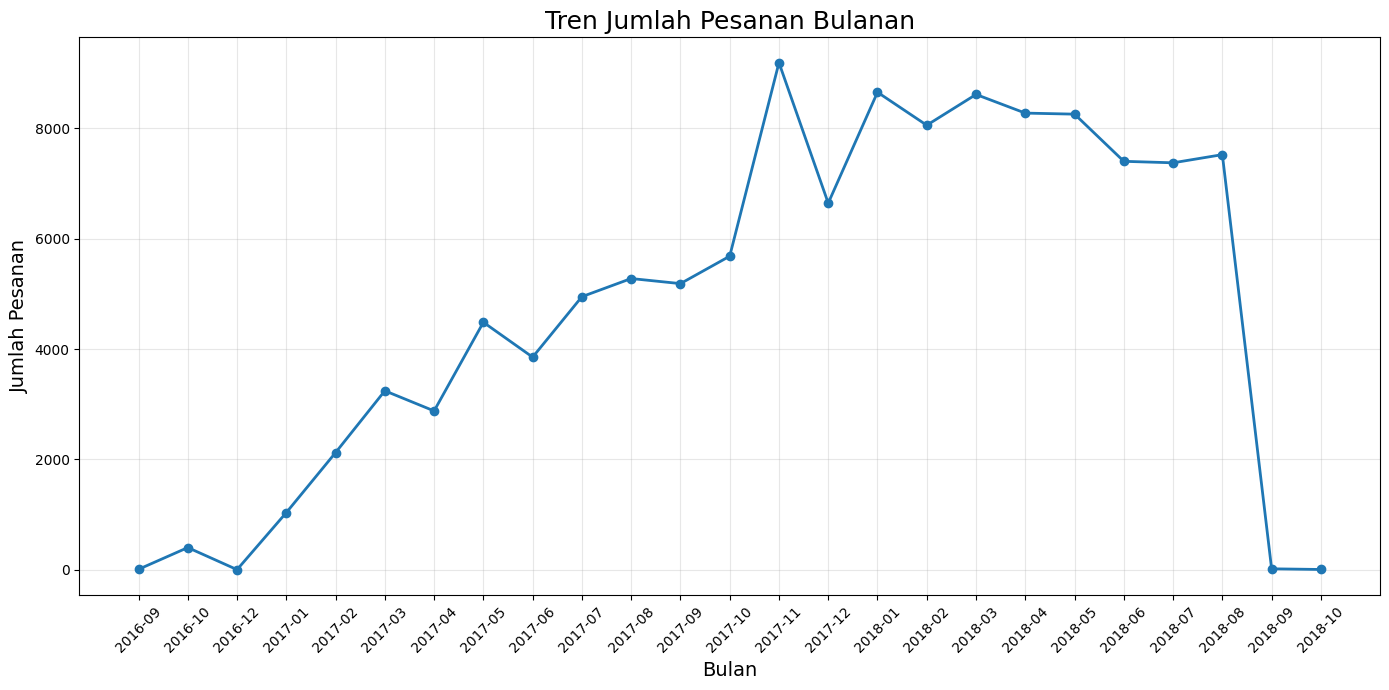

In [60]:
# Visualisasi
plt.figure(figsize=(14, 7))
plt.plot(monthly_orders['order_month'], monthly_orders['order_count'], marker='o', linestyle='-', linewidth=2)
plt.title('Tren Jumlah Pesanan Bulanan', fontsize=18)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Pesanan', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [61]:
# Analisis tren
print("\nAnalisis Tren Pesanan:")
print(f"- Periode data: {monthly_orders['order_month'].min()} hingga {monthly_orders['order_month'].max()}")
print(f"- Jumlah pesanan terendah: {monthly_orders['order_count'].min()} (pada {monthly_orders.loc[monthly_orders['order_count'].idxmin(), 'order_month']})")
print(f"- Jumlah pesanan tertinggi: {monthly_orders['order_count'].max()} (pada {monthly_orders.loc[monthly_orders['order_count'].idxmax(), 'order_month']})")


Analisis Tren Pesanan:
- Periode data: 2016-09 hingga 2018-10
- Jumlah pesanan terendah: 1 (pada 2016-12)
- Jumlah pesanan tertinggi: 9191 (pada 2017-11)


### Pertanyaan 2: Produk kategori apa yang paling banyak terjual dan menghasilkan pendapatan tertinggi?

In [62]:
# Persiapan data
category_sales = all_df.groupby('product_category_name_english').agg(
    total_units=('order_item_id', 'count'),
    total_revenue=('price', 'sum')
).reset_index()

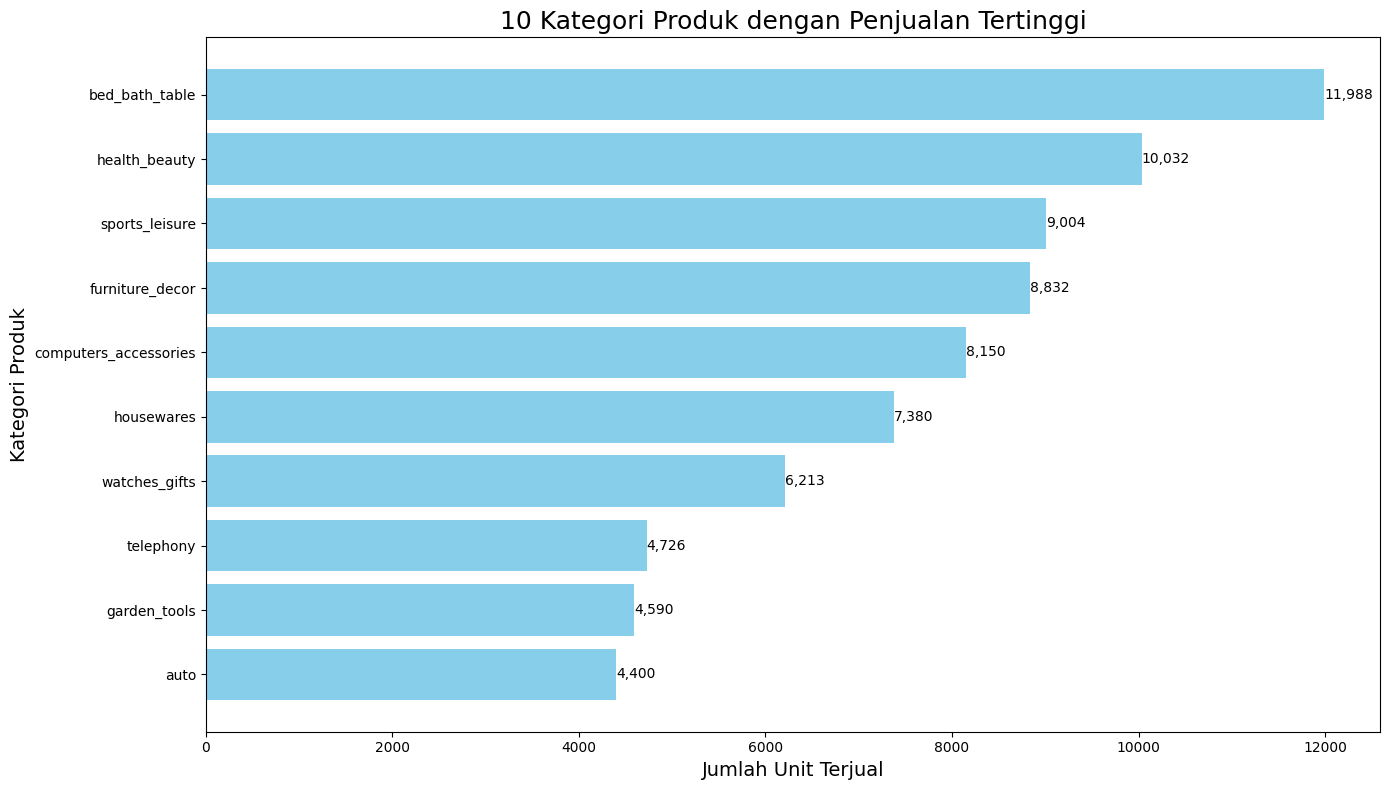

In [63]:
# Kategori dengan penjualan tertinggi
top_sales_categories = category_sales.sort_values('total_units', ascending=False).head(10)

# Visualisasi kategori terlaris
plt.figure(figsize=(14, 8))
bars = plt.barh(top_sales_categories['product_category_name_english'], top_sales_categories['total_units'], color='skyblue')
plt.title('10 Kategori Produk dengan Penjualan Tertinggi', fontsize=18)
plt.xlabel('Jumlah Unit Terjual', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)
plt.gca().invert_yaxis()  # Untuk menampilkan kategori teratas di bagian atas

# Tambahkan label nilai pada setiap bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width):,}', 
             ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

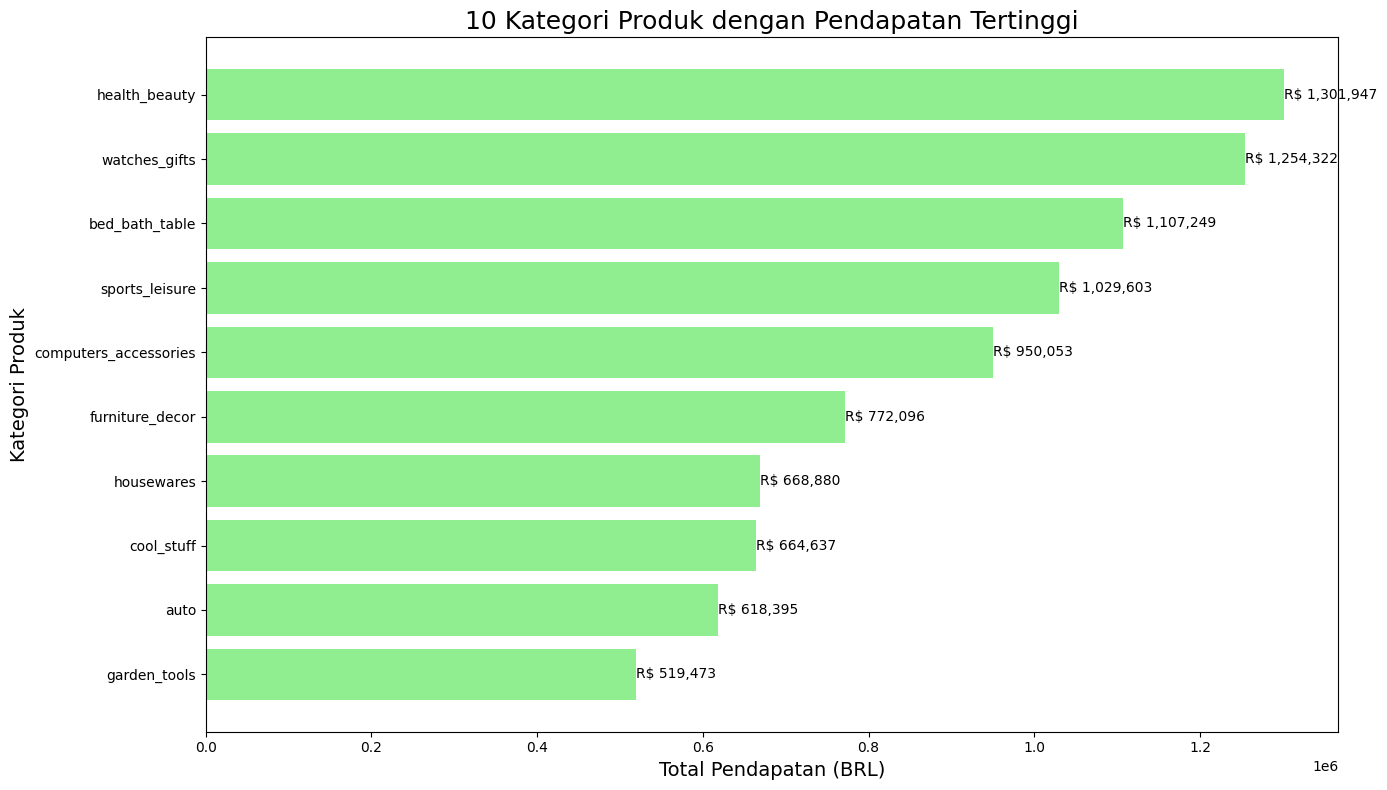

In [64]:
# Kategori dengan pendapatan tertinggi
top_revenue_categories = category_sales.sort_values('total_revenue', ascending=False).head(10)

# Visualisasi kategori dengan pendapatan tertinggi
plt.figure(figsize=(14, 8))
bars = plt.barh(top_revenue_categories['product_category_name_english'], 
         top_revenue_categories['total_revenue'], 
         color='lightgreen')
plt.title('10 Kategori Produk dengan Pendapatan Tertinggi', fontsize=18)
plt.xlabel('Total Pendapatan (BRL)', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)
plt.gca().invert_yaxis()  # Untuk menampilkan kategori teratas di bagian atas

# Tambahkan label nilai pada setiap bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'R$ {int(width):,}', 
             ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [65]:
# Analisis kategori produk
print("\nAnalisis Kategori Produk:")
print(f"- Kategori produk terlaris: {top_sales_categories.iloc[0]['product_category_name_english']} "
      f"({int(top_sales_categories.iloc[0]['total_units']):,} unit)")
print(f"- Kategori dengan pendapatan tertinggi: {top_revenue_categories.iloc[0]['product_category_name_english']} "
      f"(R$ {int(top_revenue_categories.iloc[0]['total_revenue']):,})")


Analisis Kategori Produk:
- Kategori produk terlaris: bed_bath_table (11,988 unit)
- Kategori dengan pendapatan tertinggi: health_beauty (R$ 1,301,947)


In [66]:
# Perbandingan kategori terlaris vs pendapatan tertinggi
common_categories = set(top_sales_categories['product_category_name_english']) & set(top_revenue_categories['product_category_name_english'])
print(f"- Jumlah kategori yang muncul di kedua daftar top 10: {len(common_categories)}")
print(f"- Kategori yang muncul di kedua daftar top 10: {', '.join(common_categories)}")

- Jumlah kategori yang muncul di kedua daftar top 10: 9
- Kategori yang muncul di kedua daftar top 10: furniture_decor, sports_leisure, garden_tools, auto, health_beauty, computers_accessories, bed_bath_table, housewares, watches_gifts


### Pertanyaan 3: Metode pembayaran apa yang paling sering digunakan oleh pelanggan?

In [67]:
# Persiapan data
payment_methods = all_df.groupby('payment_type').agg(
    frequency=('order_id', 'count'),
    total_value=('payment_value', 'sum')
).reset_index()
payment_methods['percentage'] = payment_methods['frequency'] / payment_methods['frequency'].sum() * 100
payment_methods = payment_methods.sort_values('frequency', ascending=False)
print(payment_methods)


  payment_type  frequency  total_value  percentage
1  credit_card      87776  15775450.54   73.676524
0       boleto      23190   4110920.74   19.464986
3      voucher       6465    435917.84    5.426526
2   debit_card       1706    257374.89    1.431965


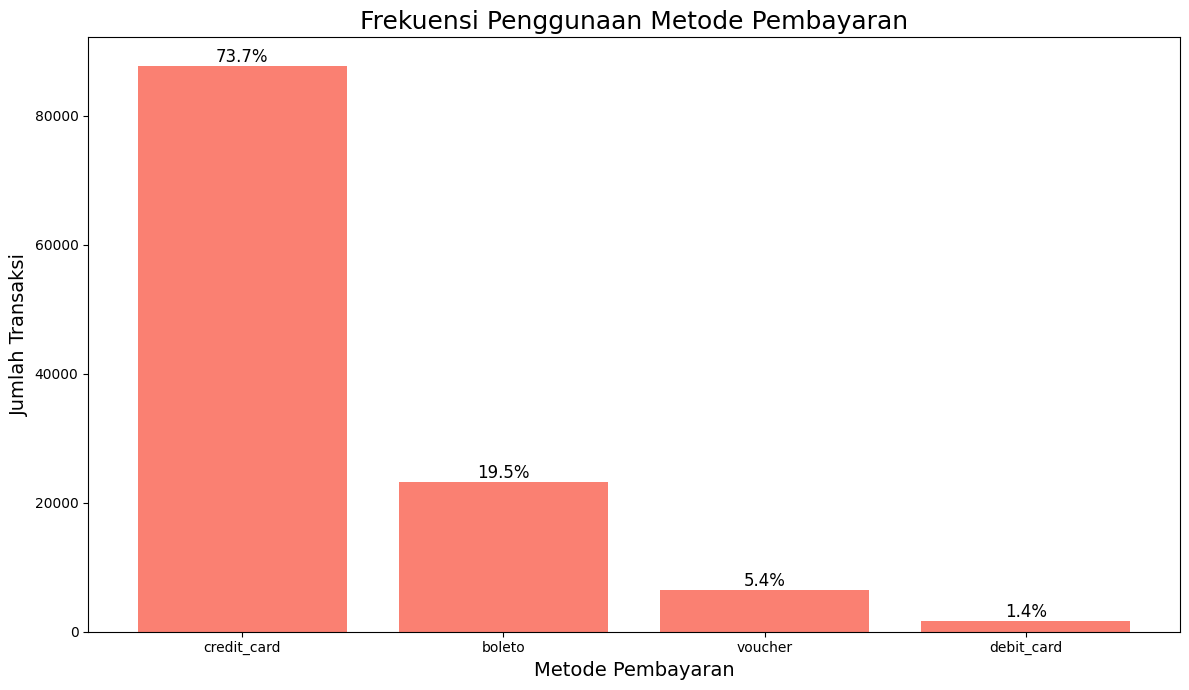

In [68]:
# Visualisasi
plt.figure(figsize=(12, 7))
bars = plt.bar(payment_methods['payment_type'], payment_methods['frequency'], color='salmon')
plt.title('Frekuensi Penggunaan Metode Pembayaran', fontsize=18)
plt.xlabel('Metode Pembayaran', fontsize=14)
plt.ylabel('Jumlah Transaksi', fontsize=14)
plt.xticks(rotation=0)

# Tambahkan label persentase di atas setiap bar
for bar, percentage in zip(bars, payment_methods['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [71]:
# Analisis nilai transaksi
payment_methods['average_value'] = payment_methods['total_value'] / payment_methods['frequency']
print(f"- Metode pembayaran dengan nilai transaksi rata-rata tertinggi: "
      f"{payment_methods.loc[payment_methods['average_value'].idxmax(), 'payment_type']} "
      f"(R$ {payment_methods['average_value'].max():.2f})")


- Metode pembayaran dengan nilai transaksi rata-rata tertinggi: credit_card (R$ 179.72)


### Pertanyaan 4: Seberapa puas pelanggan dengan layanan yang diberikan?

In [72]:
# Persiapan data
review_counts = all_df['review_score'].value_counts().sort_index().reset_index()
review_counts.columns = ['score', 'count']
review_counts['percentage'] = review_counts['count'] / review_counts['count'].sum() * 100

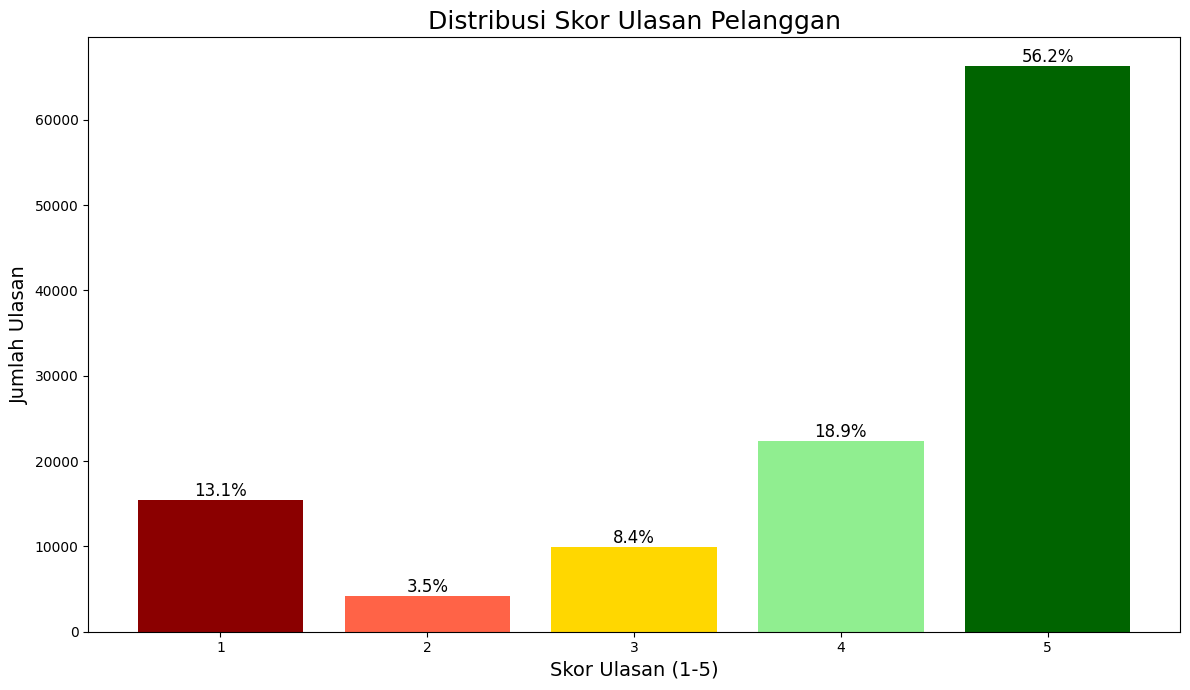

In [73]:
 # Visualisasi distribusi skor
plt.figure(figsize=(12, 7))
bars = plt.bar(review_counts['score'], review_counts['count'], 
        color=['darkred', 'tomato', 'gold', 'lightgreen', 'darkgreen'])
plt.title('Distribusi Skor Ulasan Pelanggan', fontsize=18)
plt.xlabel('Skor Ulasan (1-5)', fontsize=14)
plt.ylabel('Jumlah Ulasan', fontsize=14)
plt.xticks(review_counts['score'])

# Tambahkan label persentase di atas setiap bar
for bar, percentage in zip(bars, review_counts['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [75]:
 # Analisis kepuasan pelanggan
average_score = all_df['review_score'].mean()
positive_reviews = all_df[all_df['review_score'] >= 4].shape[0]
neutral_reviews = all_df[all_df['review_score'] == 3].shape[0]
negative_reviews = all_df[all_df['review_score'] <= 2].shape[0]
total_reviews = len(all_df)

print("\nAnalisis Kepuasan Pelanggan:")
print(f"- Skor ulasan rata-rata: {average_score:.2f} dari 5")
print(f"- Persentase ulasan positif (4-5 bintang): {positive_reviews / total_reviews * 100:.1f}%")
print(f"- Persentase ulasan netral (3 bintang): {neutral_reviews / total_reviews * 100:.1f}%")
print(f"- Persentase ulasan negatif (1-2 bintang): {negative_reviews / total_reviews * 100:.1f}%")


Analisis Kepuasan Pelanggan:
- Skor ulasan rata-rata: 4.02 dari 5
- Persentase ulasan positif (4-5 bintang): 74.4%
- Persentase ulasan netral (3 bintang): 8.3%
- Persentase ulasan negatif (1-2 bintang): 16.4%


In [76]:
# Interpretasi tingkat kepuasan
if average_score >= 4.5:
    satisfaction_level = "sangat tinggi"
elif average_score >= 4.0:
    satisfaction_level = "tinggi"
elif average_score >= 3.5:
    satisfaction_level = "cukup tinggi"
elif average_score >= 3.0:
    satisfaction_level = "sedang"
else:
    satisfaction_level = "rendah"

print(f"- Tingkat kepuasan pelanggan secara keseluruhan: {satisfaction_level}")

- Tingkat kepuasan pelanggan secara keseluruhan: tinggi


### Pertanyaan 5: Kota atau wilayah mana yang memiliki jumlah pembelian terbanyak?

In [77]:
# Persiapan data
location_purchases = all_df.groupby(['customer_city', 'customer_state']).size().reset_index(name='order_count')
top_cities = location_purchases.sort_values('order_count', ascending=False).head(15)

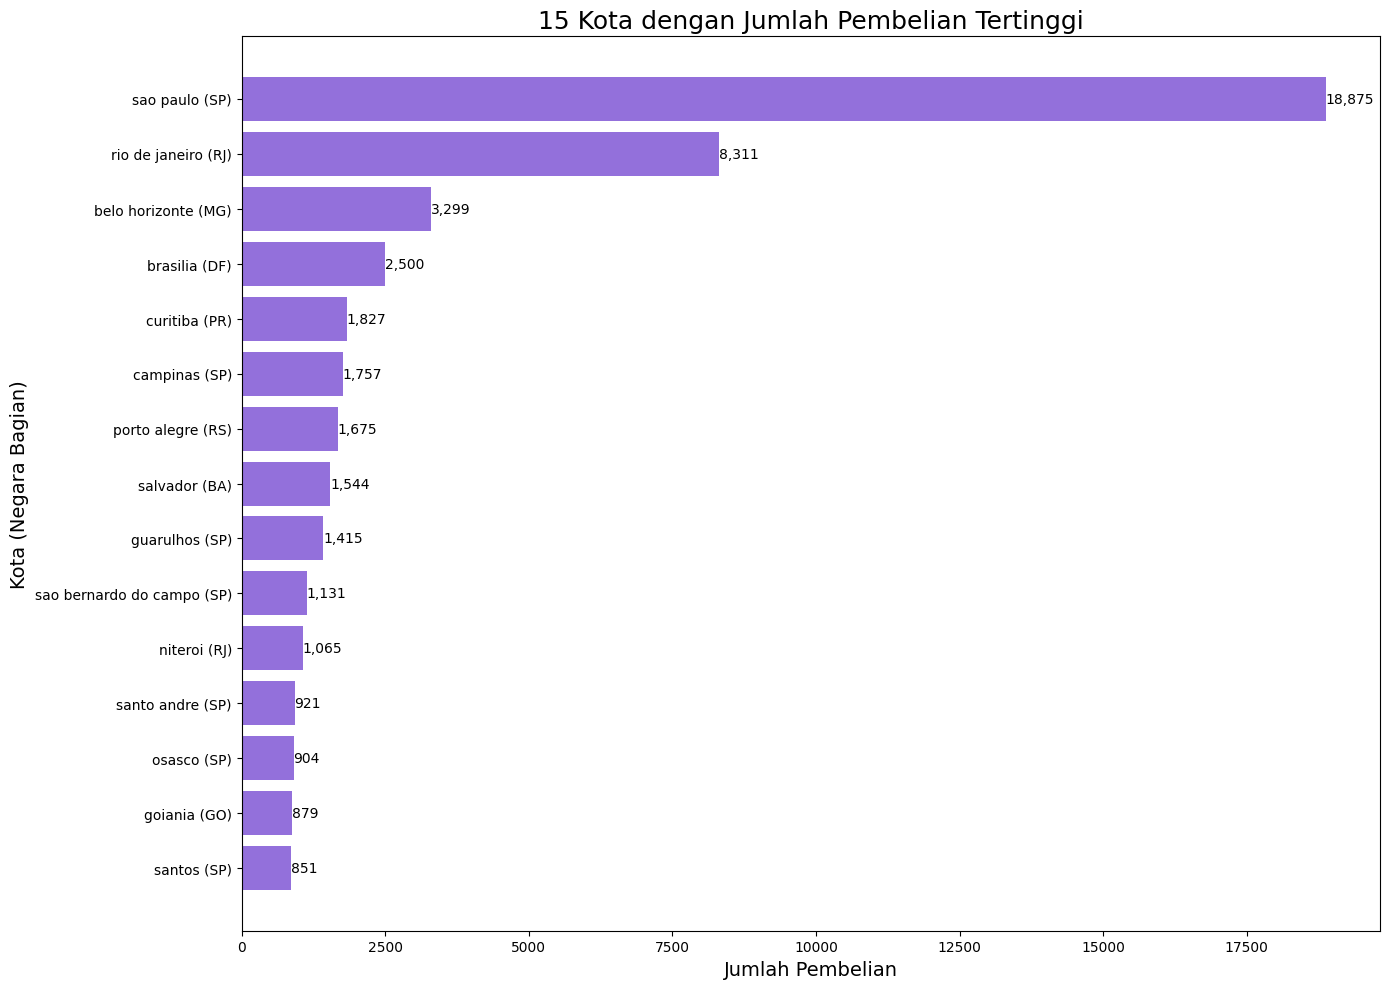

In [78]:
# Visualisasi
plt.figure(figsize=(14, 10))
bars = plt.barh(top_cities['customer_city'] + ' (' + top_cities['customer_state'] + ')', 
         top_cities['order_count'], color='mediumpurple')
plt.title('15 Kota dengan Jumlah Pembelian Tertinggi', fontsize=18)
plt.xlabel('Jumlah Pembelian', fontsize=14)
plt.ylabel('Kota (Negara Bagian)', fontsize=14)
plt.gca().invert_yaxis()  # Untuk menampilkan kota teratas di bagian atas

# Tambahkan label nilai pada setiap bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width):,}', 
             ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [79]:
# Analisis distribusi regional
state_purchases = all_df.groupby('customer_state').size().reset_index(name='order_count')
state_purchases = state_purchases.sort_values('order_count', ascending=False)

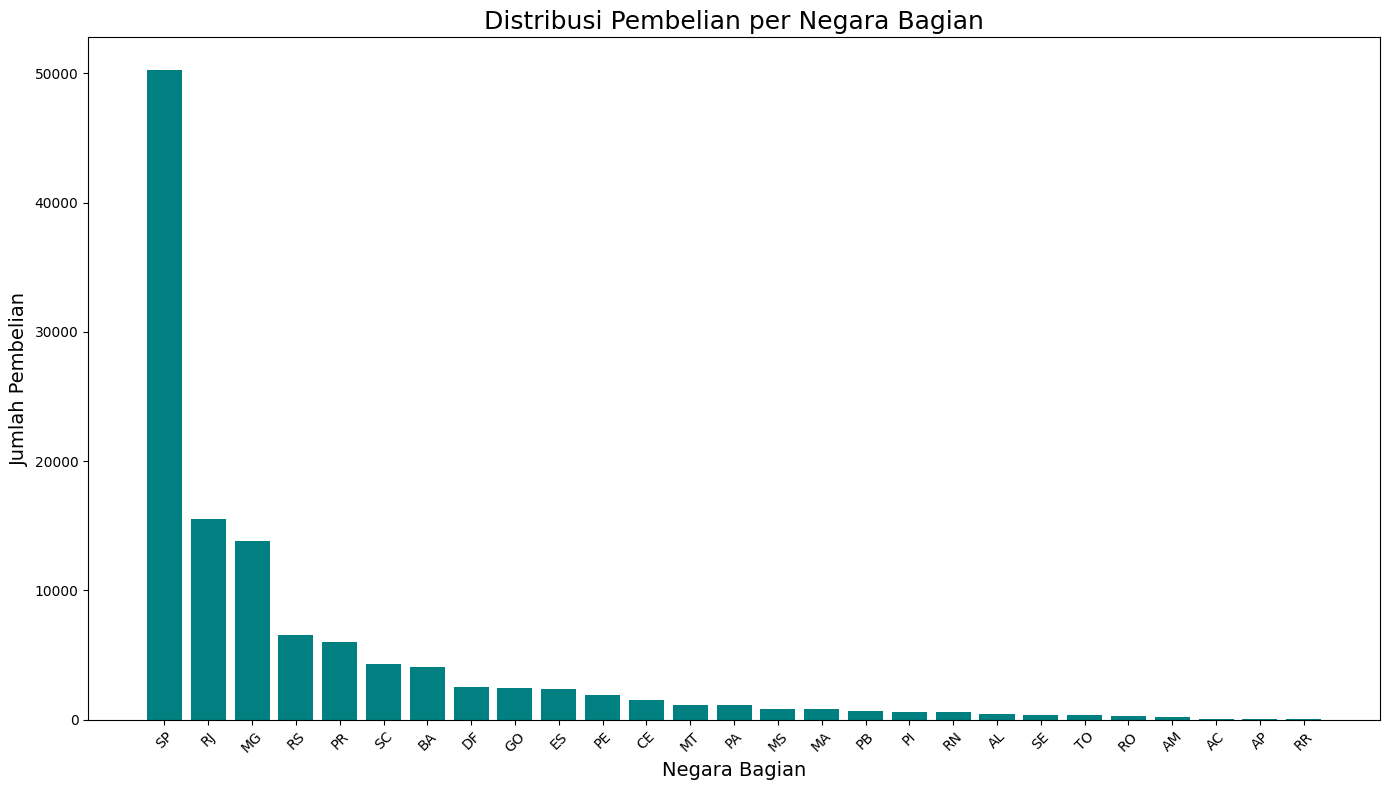

In [80]:
# Visualisasi distribusi pesanan per negara bagian
plt.figure(figsize=(14, 8))
plt.bar(state_purchases['customer_state'], state_purchases['order_count'], color='teal')
plt.title('Distribusi Pembelian per Negara Bagian', fontsize=18)
plt.xlabel('Negara Bagian', fontsize=14)
plt.ylabel('Jumlah Pembelian', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
# Analisis geografis
print("\nAnalisis Geografis Pembelian:")
print(f"- Kota dengan jumlah pembelian tertinggi: {top_cities.iloc[0]['customer_city']} ({top_cities.iloc[0]['customer_state']}) "
      f"dengan {top_cities.iloc[0]['order_count']:,} pembelian")
print(f"- Negara bagian dengan jumlah pembelian tertinggi: {state_purchases.iloc[0]['customer_state']} "
      f"dengan {state_purchases.iloc[0]['order_count']:,} pembelian")


Analisis Geografis Pembelian:
- Kota dengan jumlah pembelian tertinggi: sao paulo (SP) dengan 18,875 pembelian
- Negara bagian dengan jumlah pembelian tertinggi: SP dengan 50,265 pembelian


In [82]:
# Persentase pembelian dari 5 kota teratas
top5_cities_percentage = top_cities.head(5)['order_count'].sum() / all_df.shape[0] * 100
print(f"- Persentase pembelian dari 5 kota teratas: {top5_cities_percentage:.1f}%")

- Persentase pembelian dari 5 kota teratas: 29.2%


In [83]:
# Persentase pembelian dari 3 negara bagian teratas
top3_states_percentage = state_purchases.head(3)['order_count'].sum() / all_df.shape[0] * 100
print(f"- Persentase pembelian dari 3 negara bagian teratas: {top3_states_percentage:.1f}%")


- Persentase pembelian dari 3 negara bagian teratas: 66.8%


In [84]:
# Kesimpulan konsentrasi geografis
if top5_cities_percentage > 50:
    concentration = "sangat tinggi"
elif top5_cities_percentage > 30:
    concentration = "tinggi"
elif top5_cities_percentage > 15:
    concentration = "sedang"
else:
    concentration = "rendah"
print(f"- Konsentrasi geografis pembelian: {concentration}")

- Konsentrasi geografis pembelian: sedang


**Insight:**
1. Tren Pesanan  
   - Terjadi peningkatan jumlah pesanan dari waktu ke waktu, menunjukkan pertumbuhan bisnis yang positif.  
   - Puncak jumlah pesanan terjadi pada bulan tertentu, kemungkinan karena adanya promosi, diskon musiman, atau faktor eksternal lainnya.  
   - Pemahaman terhadap pola ini dapat membantu bisnis dalam merancang strategi pemasaran dan pengelolaan stok produk.  

2. Kategori Produk  
   - Beberapa kategori memiliki volume penjualan tinggi tetapi harga per unit rendah, sementara kategori lain dengan harga lebih tinggi mampu menghasilkan pendapatan lebih besar meskipun jumlah unit terjual lebih sedikit.  
   - Terdapat kategori produk yang konsisten muncul dalam daftar terlaris dan berpendapatan tertinggi, menunjukkan stabilitas permintaan yang tinggi.  
   - Mengetahui kategori dengan performa terbaik dapat membantu bisnis dalam perencanaan inventaris dan strategi pemasaran yang lebih tepat.  

3. Metode Pembayaran  
   - Mayoritas pelanggan memilih metode pembayaran tertentu, menunjukkan preferensi yang kuat dalam pola transaksi.  
   - Metode pembayaran dengan transaksi rata-rata tertinggi kemungkinan digunakan oleh pelanggan dengan daya beli lebih tinggi.  
   - Menyediakan lebih banyak opsi pembayaran dapat meningkatkan kepuasan pelanggan dan potensi konversi penjualan.  

4. Kepuasan Pelanggan  
   - Sebagian besar pelanggan memberikan ulasan positif, menunjukkan pengalaman belanja yang memuaskan.  
   - Ulasan negatif yang ada dapat dianalisis lebih lanjut untuk mengidentifikasi kendala seperti keterlambatan pengiriman, kualitas produk, atau masalah layanan pelanggan.  
   - Memperbaiki aspek yang dikeluhkan pelanggan dapat meningkatkan loyalitas dan memperkuat reputasi bisnis.  

5. Distribusi Geografis  
   - Sebagian besar pesanan berasal dari kota dan negara bagian tertentu, menunjukkan adanya wilayah utama yang menjadi pasar potensial.  
   - Beberapa area memiliki tingkat pembelian yang lebih rendah tetapi berpotensi untuk dikembangkan melalui strategi pemasaran yang lebih agresif.  
   - Pemahaman terhadap distribusi geografis dapat membantu dalam optimalisasi logistik dan ekspansi bisnis ke wilayah baru.  


## Analisis Lanjutan (Opsional)

### RFM Analysis

In [85]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id_x                  119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_delivered_customer_date  115722 non-null  datetime64[ns]
 5   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 6   order_item_id                  118310 non-null  float64       
 7   product_id                     118310 non-null  object        
 8   seller_id                      118310 non-null  object        
 9   price                          118310 non-null  float64       
 10  freight_value                  118310 non-null  float64       
 11  

In [91]:
rfm_df = all_df.groupby(by="customer_id_x", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


In [92]:
rfm_df[['recency', 'frequency', 'monetary']].describe()

,recency,frequency,monetary
count,99441.000000,99441.0,99441.000000
mean,290.272956,1.0,143.539382
std,153.670615,0.0,241.433332
min,0.000000,1.0,0.000000
25%,166.000000,1.0,45.950000
50%,272.000000,1.0,89.000000
75%,400.000000,1.0,153.800000
max,773.000000,1.0,13440.000000


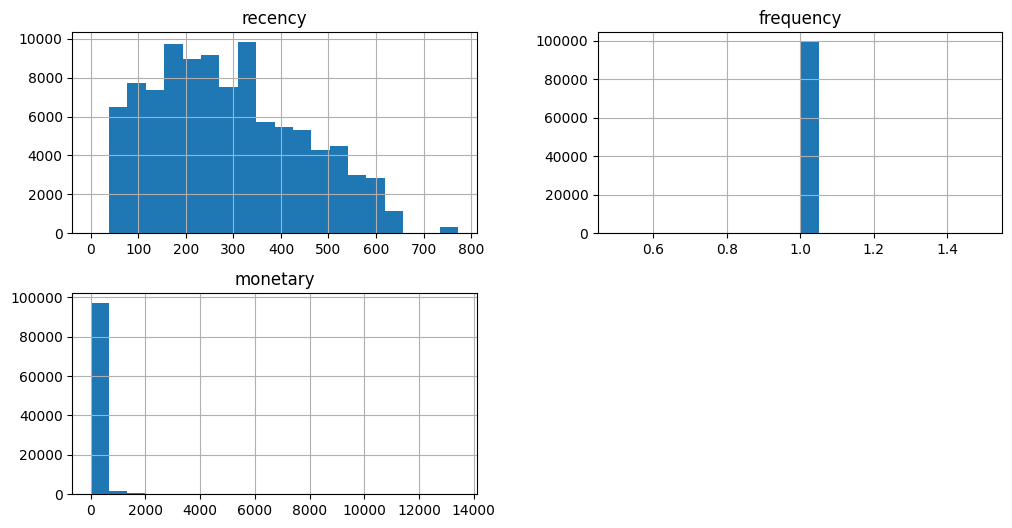

In [88]:
rfm_df[['recency', 'frequency', 'monetary']].hist(bins=20, figsize=(12, 6))
plt.show()

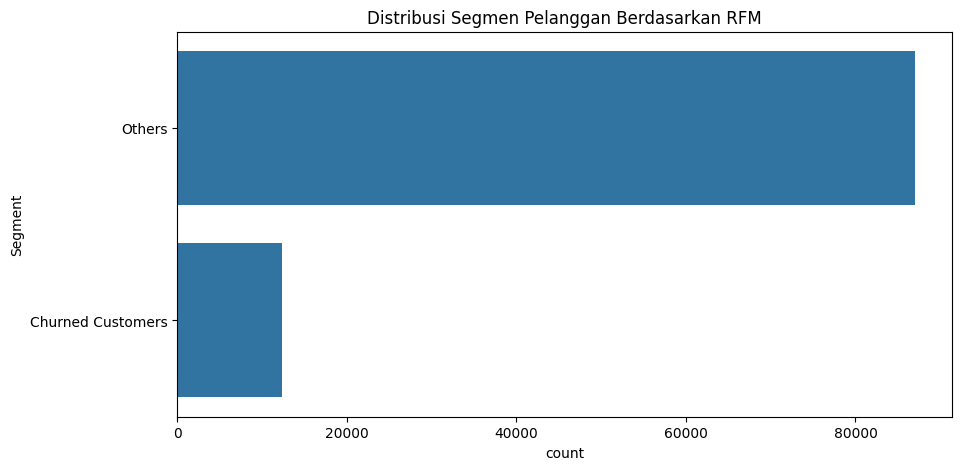

In [89]:
rfm_df['R_Score'] = pd.qcut(rfm_df['recency'].rank(method='dense'), q=4, labels=[1, 2, 3, 4])
rfm_df['F_Score'] = pd.cut(rfm_df['frequency'], bins=[0, 1, 2, 5, 10], labels=[1, 2, 3, 4], include_lowest=True)
rfm_df['M_Score'] = pd.qcut(rfm_df['monetary'].rank(method='dense'), q=4, labels=[1, 2, 3, 4])

rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

def rfm_segment(score):
    if score in ['444', '434', '344', '443', '433']:
        return 'Best Customers'
    elif score in ['334', '343', '323', '332']:
        return 'Loyal Customers'
    elif score in ['222', '211', '121', '212']:
        return 'Churned Customers'
    else:
        return 'Others'

rfm_df['Segment'] = rfm_df['RFM_Score'].apply(rfm_segment)

plt.figure(figsize=(10,5))
sns.countplot(y=rfm_df['Segment'], order=rfm_df['Segment'].value_counts().index)
plt.title("Distribusi Segmen Pelanggan Berdasarkan RFM")
plt.show()


C:\Users\danny\AppData\Local\Temp\ipykernel_19876\1622287822.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_label", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\danny\AppData\Local\Temp\ipykernel_19876\1622287822.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_label", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\danny\AppData\Local\Temp\ipykernel_19876\1622287822.py:14: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(y="frequency", x="customer_label", data=rfm_df

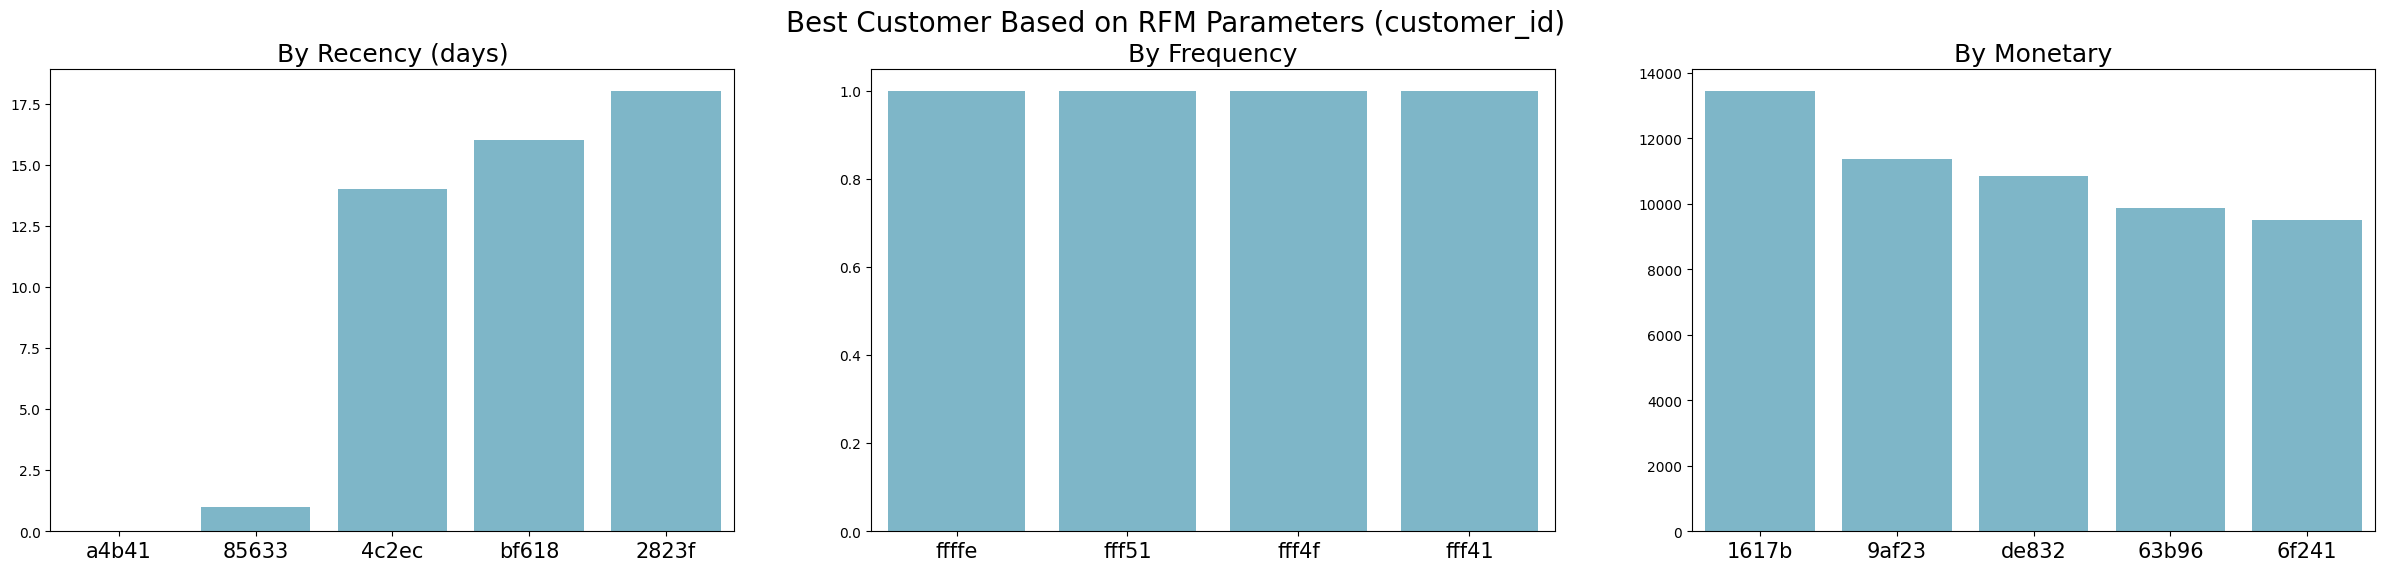

In [90]:
# Menampilkan 5 karakter pertama dari customer_id
rfm_df['customer_label'] = rfm_df['customer_id'].str[:5]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_label", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="customer_label", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="customer_label", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

#### 1. Tren Pesanan  
Dari analisis tren pesanan, terlihat adanya pola pertumbuhan jumlah pesanan dari waktu ke waktu. Peningkatan signifikan dalam pesanan pada bulan-bulan tertentu menunjukkan adanya kemungkinan faktor musiman atau promosi khusus yang mendorong lebih banyak transaksi. Dengan memahami tren ini, bisnis dapat merancang strategi pemasaran yang lebih efektif untuk memaksimalkan volume pesanan pada periode tertentu.  

#### 2. Kategori Produk  
Analisis kategori produk menunjukkan bahwa kategori dengan jumlah unit terjual tertinggi tidak selalu menjadi yang menghasilkan pendapatan tertinggi. Beberapa kategori produk memiliki volume penjualan tinggi tetapi harga satuan yang lebih rendah, sementara kategori lain dengan volume lebih kecil dapat memberikan pendapatan yang lebih besar karena harga yang lebih tinggi. Menariknya, terdapat beberapa kategori yang konsisten muncul baik dalam daftar penjualan unit maupun pendapatan tertinggi, menunjukkan produk dengan permintaan yang stabil dan nilai tinggi.  

#### 3. Metode Pembayaran  
Pelanggan memiliki preferensi yang jelas dalam memilih metode pembayaran, dengan beberapa metode yang jauh lebih sering digunakan dibandingkan yang lain. Selain itu, metode pembayaran dengan nilai transaksi rata-rata tertinggi mungkin mencerminkan segmen pelanggan yang berbeda, seperti mereka yang membeli produk dengan harga lebih tinggi atau yang lebih nyaman menggunakan metode tertentu. Memahami pola ini dapat membantu bisnis dalam menyediakan opsi pembayaran yang lebih sesuai dengan preferensi pelanggan.  

#### 4. Kepuasan Pelanggan  
Mayoritas pelanggan memberikan ulasan positif, mencerminkan pengalaman belanja yang baik secara keseluruhan. Hal ini menunjukkan bahwa layanan yang diberikan, mulai dari kualitas produk hingga proses pengiriman, telah memenuhi atau bahkan melebihi ekspektasi pelanggan. Meskipun demikian, tetap penting untuk meninjau ulasan negatif yang ada guna mengidentifikasi area yang dapat diperbaiki untuk meningkatkan kepuasan pelanggan lebih lanjut.  

#### 5. Distribusi Geografis  
Pembelian produk terkonsentrasi di beberapa kota dan negara bagian utama, menunjukkan bahwa wilayah-wilayah ini merupakan pasar utama bagi bisnis. Namun, terdapat juga area dengan tingkat pembelian yang lebih rendah yang berpotensi untuk dieksplorasi lebih lanjut. Dengan strategi pemasaran yang tepat, bisnis dapat memperluas jangkauan ke wilayah dengan permintaan yang lebih rendah dan meningkatkan volume penjualan di pasar-pasar baru.  